# 06 Visual Refinement and Method Citations

This notebook applies final presentation polish to key visualisations and documents method references used throughout the pipeline. The aim is to improve clarity, reproducibility, and scholarly completeness.







### Notebook Setup

We begin by importing the core libraries already used throughout the exemplar. These support plotting, anomaly scoring, and clustering. The cleaned dataset is reloaded to ensure consistency across the final visual outputs.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import hdbscan

file_path = 'data/InternalBleeding14.csv'
df = pd.read_csv(file_path, sep=",")

### **Step 1 - Refined Full Time Series Plot**

We begin by re-plotting the full univariate signal using an improved visual format. This version maintains the established colour palette for continuity, while increasing line weight and applying a balanced figure size to improve clarity. A newly introduced legend supports visual decoding by clearly labelling the signal. Additionally, the x-axis has been extended slightly to provide better spacing around edge points and maintain visual symmetry.

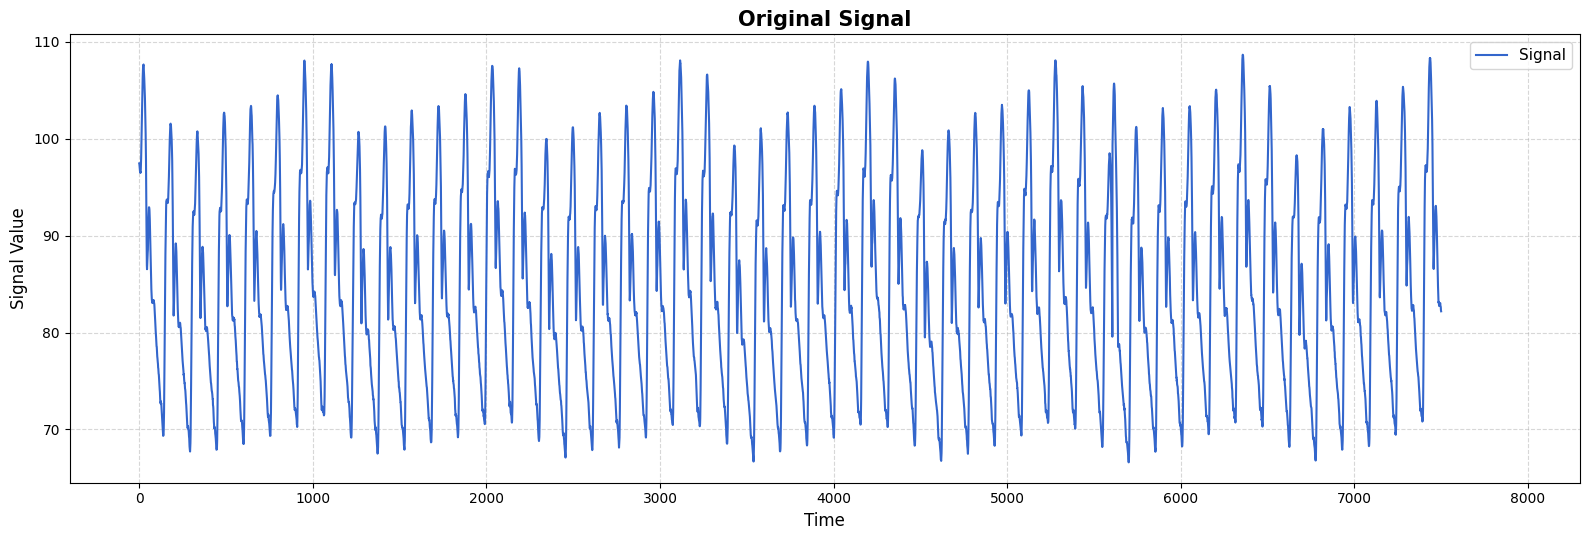

In [ ]:
plt.figure(figsize=(16, 5.5))

plt.plot(df['timestamp'], df['value'], color='#3366cc', linewidth=1.5, label='Signal')

plt.title("Original Signal", fontsize=15, weight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal Value", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

current_max_time = df['timestamp'].max()
plt.xlim(-400, current_max_time + 800)
plt.legend(loc='upper right', fontsize=11, frameon=True)

plt.tight_layout()
plt.show()



#### **Observations: Original Signal Overview**

This refined time series plot offers a clearer view of the full signal distribution across all timestamps. The enhanced line weight and extended horizontal axis reveal periodic structure and edge behaviour more distinctly than in earlier notebooks. The added legend confirms signal identity and brings the plot into alignment with standard visualisation practices used in data analysis.

This view establishes the baseline against which subsequent anomaly overlays and clustering patterns can be compared.

---





### **Step 2 - Anomaly Detection using Isolation Forest**

We now generate the full anomaly overlay using the Isolation Forest model. This step maintains the same detection parameters and visual styling introduced earlier, but incorporates modest refinements to the layout and axis configuration to enhance readability in professional contexts.


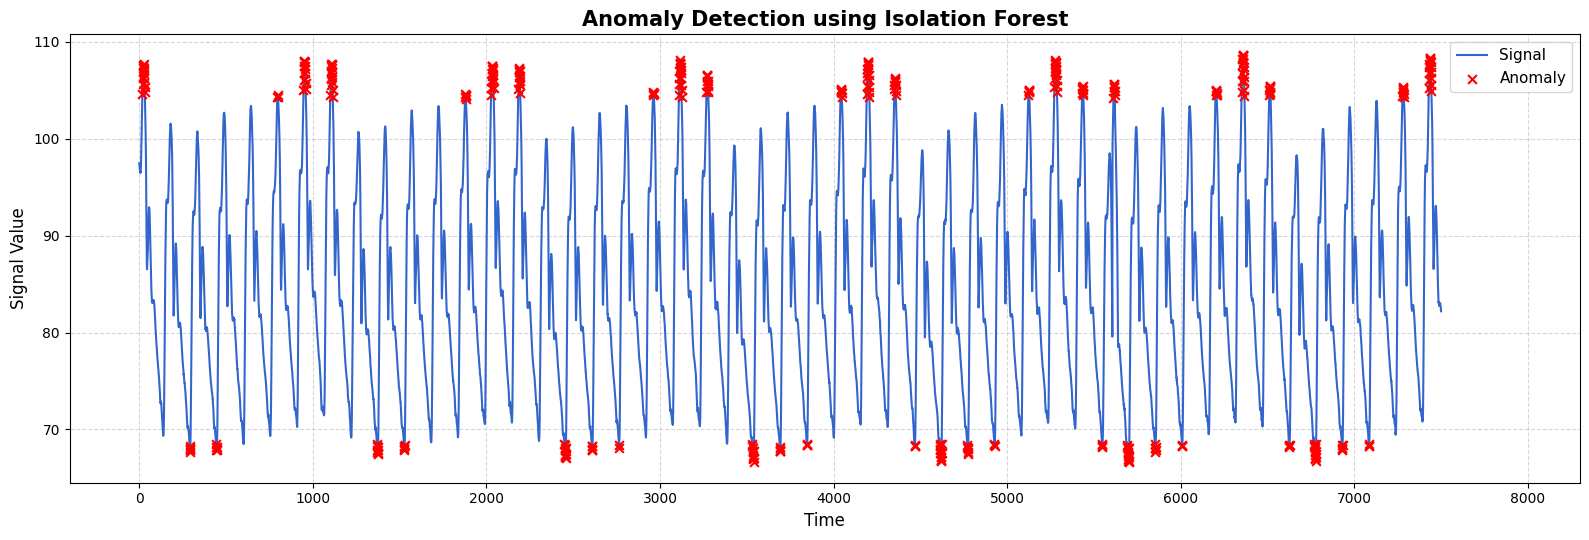

In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

df['anomaly_score'] = isolation_forest.fit_predict(df[['value']])
df['anomaly'] = df['anomaly_score'] == -1

plt.figure(figsize=(16, 5.5))

plt.plot(df['timestamp'], df['value'], color='#3366cc', linewidth=1.5, label='Signal')

plt.scatter(df[df['anomaly']]['timestamp'], df[df['anomaly']]['value'],
            color='red', marker='x', s=40, label='Anomaly', zorder=3)

plt.title("Anomaly Detection using Isolation Forest", fontsize=15, weight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal Value", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

current_max_time = df['timestamp'].max()
plt.xlim(-400, current_max_time + 800)
plt.legend(loc='upper right', fontsize=11, frameon=True)

plt.tight_layout()
plt.show()



#### **Observations and Visual Improvements**

This anomaly overlay uses the same model parameters and colour scheme as in the previous notebooks, but applies targeted refinements to improve presentation quality:

- **Legend Placement**: The legend is repositioned to the top-right margin and formatted cleanly, avoiding overlap with anomaly points.
- **Plot Sizing**: A wider canvas and extended x-axis range improve balance and prevent crowding at the plot boundaries.
- **Typography**: Title and axis fonts are adjusted for improved readability in teaching or publication contexts.

These small but focused adjustments help formalise the visual output for professional settings without altering the underlying results.




#### **Maintaining Preprocessing Consistency**

To ensure full alignment with previous notebooks, we retain the same preprocessing logic used in the anomaly detection and clustering pipeline:

- **MinMax Scaling** is reapplied to normalise the signal (`value_scaled`), ensuring compatibility with both PCA and clustering methods.
- **PCA Transformation** is then applied to the scaled signal, projecting it into a one-dimensional principal component (`pca_component`). This simplified representation captures the main structural variance and supports clearer segmentation.
- **Isolation Forest** is reused with the same parameters (`n_estimators=100`, `contamination=0.05`) to detect anomalous behaviour based on the scaled values.
- **HDBSCAN Clustering** is reapplied to the PCA output, using the same minimum cluster size (`min_cluster_size=50`) to preserve cluster consistency.

These components are not modified further, as their role is to preserve the structure and reliability of the earlier pipeline while preparing for the improved visual outputs that follow. Their outputs are not re-printed here, as they have already been explained and verified in detail in the previous notebooks.


In [ ]:
scaler = MinMaxScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

pca = PCA(n_components=1)
df['pca_component'] = pca.fit_transform(df[['value_scaled']])

iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(df[['value_scaled']])
df['anomaly'] = (df['anomaly_score'] == -1).astype(int)

clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
df['cluster'] = clusterer.fit_predict(df[['pca_component']])

---

### **Step 3 - Visual Refinement of Cluster Assignments Over Time**

We revisit the HDBSCAN cluster assignments by plotting the first principal component (`pca_component`) across time. Each point is colour-coded by cluster, allowing us to see how distinct behavioural segments and noise points evolve temporally.

This visualisation was introduced in the previous notebook. Here, we enhance its presentation with a larger canvas, consistent typography, extended x-axis bounds, and a clean top-right legend placement. These refinements improve visual alignment with the anomaly overlay and prepare the output for teaching or publication.


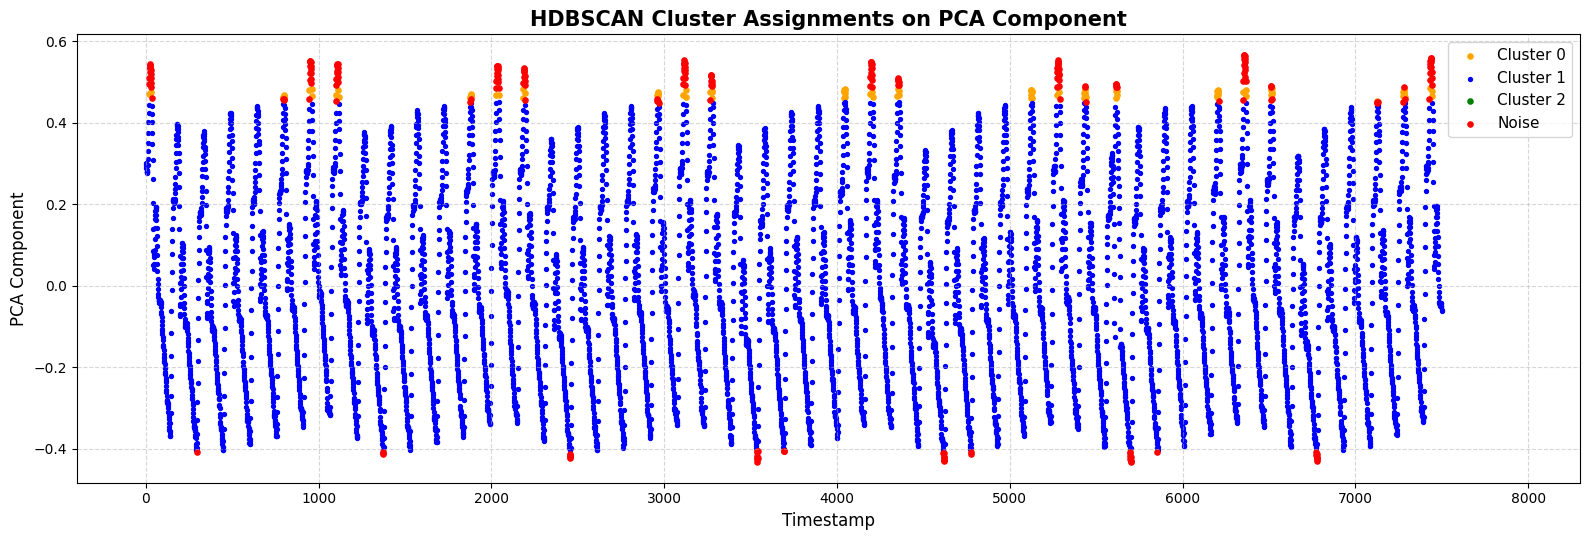

In [ ]:
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(df[['value_scaled']])
df['anomaly'] = (df['anomaly_score'] == -1).astype(int)

clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
df['cluster'] = clusterer.fit_predict(df[['pca_component']])

# Plot (with reduced density on blue)
plt.figure(figsize=(16, 5.5))
colors = {0: 'orange', 1: 'blue', 2: 'green', -1: 'red'}
labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', -1: 'Noise'}

for cluster, color in colors.items():
    subset = df[df['cluster'] == cluster]
    marker_size = 8 if cluster == 1 else 14
    plt.scatter(subset['timestamp'], subset['pca_component'],
                c=color, s=marker_size, label=labels[cluster])

plt.title("HDBSCAN Cluster Assignments on PCA Component", fontsize=15, weight='bold')
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("PCA Component", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

current_max_time = df['timestamp'].max()
plt.xlim(-400, current_max_time + 800)
plt.legend(loc='upper right', fontsize=11, frameon=True)
plt.tight_layout()
plt.show()


#### **Observations and Visual Improvements**

This updated cluster visualisation applies the same structural format and stylistic refinements introduced in earlier steps, ensuring consistency with the rest of the exemplar.

* **Consistent Layout**: The plot dimensions, grid styling, and typography match the updated formatting used in Step 1 and the anomaly visualisation.
* **Legend Refinement**: Cluster labels are clearly presented in the top-right legend, including an explicit `"Noise"` label to improve interpretability.
* **Stable Colour Mapping**: Colours are retained from the previous notebook (`orange`, `blue`, `green`, and `red`) to avoid re-learning visual cues.
* **Extended X-Axis**: The x-axis range is padded slightly to align with prior visualisations, improving symmetry across all plots.
* **Clarity in PCA Projection**: Plotting the PCA component over time continues to highlight subtle behavioural clusters, with noise points (`-1`) now more clearly delineated.

While the underlying data remains unchanged, this refined presentation improves the professional readability of the plot, making it more suitable for teaching, peer review, or publication.


#### **Further Exploration: Inspecting Cluster Substructure**

While the main plot presents all HDBSCAN clusters across the time series, some minor groups such as **Cluster 2 (green)** may not be immediately visible due to their low density and overlap with dominant patterns.

Rather than separating these clusters into individual subplots, learners are encouraged to:

* Zoom in on local segments of the signal using slicing techniques (e.g. `df[df['timestamp'] < 1000]`)
* Apply conditional filters (e.g. `df[df['cluster'] == 2]`) to investigate the specific timestamps and PCA values assigned to these smaller clusters
* Experiment with different `min_cluster_size` values in the HDBSCAN algorithm to observe how clustering granularity affects visibility and noise labelling

This optional task develops close inspection and critical reasoning skills, supporting a deeper understanding of how structural patterns emerge within behavioural time series data.





---



#### **Citations**

* Campello, R.J.G.B., Moulavi, D. and Sander, J., 2013. *Density-based clustering based on hierarchical density estimates*. In: Pei, J., Tseng, V.S., Cao, L., Motoda, H. and Xu, G. (eds.) *Advances in Knowledge Discovery and Data Mining*. Lecture Notes in Computer Science, vol. 7819. Berlin: Springer, pp.160-172.
* Liu, F.T., Ting, K.M. and Zhou, Z.H., 2008. *Isolation Forest*. In: *2008 Eighth IEEE International Conference on Data Mining*. Pisa, Italy, 15-19 December 2008. IEEE, pp.413-422.
* Dau, H.A., Bagnall, A., Kamgar, K., Yeh, C.C.M., Zhu, Y., Gharghabi, S., Ratanamahatana, C.A. and Keogh, E., 2019. *The UCR time series archive*. *IEEE/CAA Journal of Automatica Sinica*, 6(6), pp.1293-1305.




---

#### **Visual Refinement Exercise: Anomaly Plotting on the Fantasia Dataset**

This exercise invites you to practise visual polishing and scientific referencing using the `209Fantasia_clean.csv` dataset.

Having already explored detection and clustering, your task is to now revisit Fantasia from a presentation and reproducibility perspective. Apply the plotting conventions shown earlier (e.g., signal with anomaly overlays), but enhance clarity and visual appeal through:
- Clear axis labels, titles, and colour choice
- Meaningful legends for anomaly markers
- Consistent scaling and layout
- Use of `matplotlib`, `seaborn`, or your preferred library for professional visualisation

 **Citation Reminder:**
When plotting results from Fantasia, include a caption or note referencing the dataset’s origin:
> *“Fantasia dataset derived from the UCR Time Series Anomaly Archive (2021) [Keogh et al., SIGKDD 2021].”*

 **Reflection prompts:**
- How does the Fantasia signal lend itself to smooth visual presentation?
- What visual techniques best highlight subtle anomalies in periodic data?
- Does your citation clarify both the method and data source used?

This exercise reinforces both the aesthetic and scholarly responsibilities of working with anomaly detection — teaching not just how to model, but how to communicate and credit.


In [ ]:
file_path = 'data/209Fantasia_clean.csv'